In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from kid_readout.measurement.io import nc
from kid_readout.measurement import temperature
from kid_readout.equipment import hpd_temps

In [2]:
ncf = nc.NCFile('/data/detectors/2016-04-25_202526_Tc.nc')

In [3]:
sweep = ncf.sweep

In [4]:
len(sweep.stream_arrays)

240

In [5]:
sa0 = sweep.stream_arrays[0]

In [6]:
sa0.tone_bin.size

16

In [7]:
# This should be 16 too, but only the first four filter bank bins were set (the default)
sa0.tone_index.size

4

In [11]:
sa0.frequency_MHz

array([ 2800.      ,  2826.671875,  2853.328125,  2880.      ])

In [9]:
sweep.stream_arrays[0].state.temperature.primary_package

0.3951697314163182

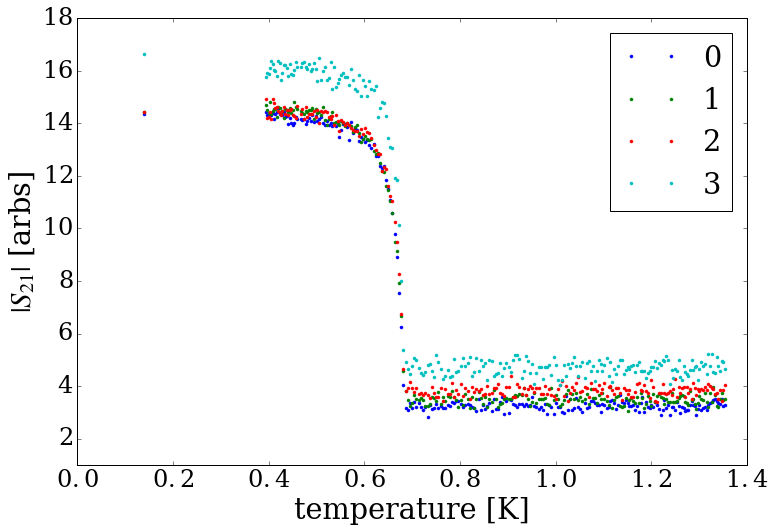

In [10]:
num_tones = 4

plt.rcParams['font.size'] = 24
#plt.rcParams['font.size'] = 6
figsize=(12, 8)
#figsize=(3, 2)
fig, ax = plt.subplots(figsize=figsize)
ax.set_xlim(0, 1.4)
ax.set_ylim(1, 18)
ax.set_xlabel('temperature [K]')
ax.set_ylabel(r'$|S_{21}|$ [arbs]')

for number in range(num_tones):
    streams = [sa.stream(number) for sa in sweep.stream_arrays]
    ax.plot([s.state.temperature.primary_package for s in streams],
            [np.abs(s.s21_point) for s in streams],
            '.', label=str(number))

ax.legend(loc='best')
fig.savefig('/home/flanigan/Demo05AlMn-0506_Tc.pdf', dpi=300)